# Problema de regressão com Redes neurais


## Passo 1: Importar bibliotecas necessárias 

In [2]:
%pip install seaborn
%pip install keras

import pathlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


2022-12-17 18:16:52.299214: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-17 18:16:53.475531: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-17 18:16:53.475681: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-17 18:16:57.415825: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

2.11.0


## Preparação dos dados


### Importar dados do CSV


     Entrada   Saída
0        0.0    0.00
1        0.5    0.25
2        1.0    1.00
3        1.5    2.25
4        2.0    4.00
..       ...     ...
212     59.6  780.40
213     59.7  785.80
214     59.8  791.20
215     59.9  796.60
216     60.0  802.00

[217 rows x 2 columns]


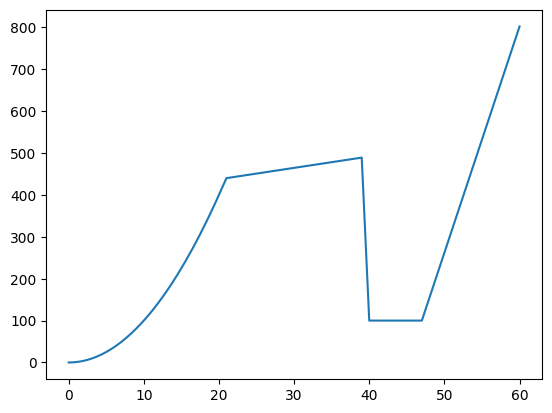

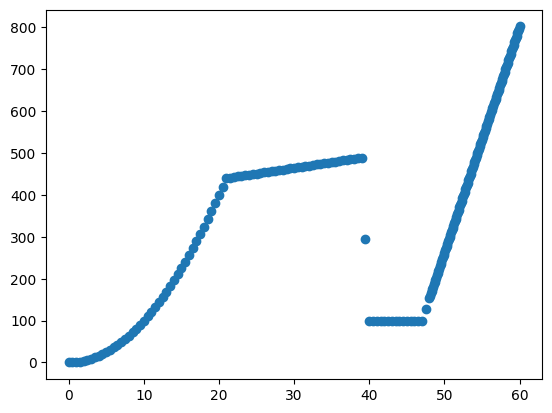

In [3]:
# Importar os dados do CSV
dados = pd.read_csv('./dadosExpandidos.csv')
print(dados)

# Gera gráfico dos dados de entrada e saída
plt.plot(dados['Entrada'], dados['Saída'])

# Cria uma nova figura
plt.figure()

# Gerá gráfico espalhados dos dados de entrada e saída
plt.scatter(dados['Entrada'], dados['Saída'])

### Normalizar dados
Converte os dados para a mesma ordem de grandeza facilitando o treinamento da rede.

In [29]:
def normalization(x):
    return x / x.abs().max()

x_normal = normalization(dados['Entrada'])
y_normal = normalization(dados['Saída'])

print(dados['Saída'].abs().max())


802.00000000001


## Compilar modelo
Serão proposta para esse trabalho três topologias de redes:

In [13]:
def build_model_1():

    # Define a topologia da rede em relação a numero de camadas e suas características
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(None, 1)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(units=1,activation='linear')
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    # Compila o modelo definindo a função de perda e as métricas que serão utilizadas
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

    return model


def build_model_2():

    # Define a topologia da rede em relação a numero de camadas e suas características
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(None, 1)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(units=1,activation='linear')
    ])


    # Compila o modelo definindo a função de perda e as métricas que serão utilizadas
    model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

    return model


def build_model_3():

    # Define a topologia da rede em relação a numero de camadas e suas características
    model = keras.Sequential([
        layers.Dense(64, activation='sigmoid', input_shape=(None, 1)),
        layers.Dense(64, activation='sigmoid'),
        layers.Dense(64, activation='sigmoid'),
        layers.Dense(units=1,activation='linear')
    ])


    # Compila o modelo definindo a função de perda e as métricas que serão utilizadas
    model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

    return model

model_1 = build_model_1()
model_2 = build_model_2()
model_3 = build_model_3()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, None, 64)          128       
                                                                 
 dense_9 (Dense)             (None, None, 64)          4160      
                                                                 
 dense_10 (Dense)            (None, None, 64)          4160      
                                                                 
 dense_11 (Dense)            (None, None, 1)           65        
                                                                 
Total params: 8,513
Trainable params: 8,513
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (

## Treinar modelo
Nessa etapa de treinamento será usado uma função callback 'printDot' para sinalizar a execução do treinamento. O modelo será treinando por 1000 epochs e serão separados 20% dos dados para validação da rede

In [15]:
class printDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')


history_1 = model_1.fit(x_normal, y_normal, epochs=3000, validation_split=0.2, verbose=0, callbacks=[printDot()])
history_2 = model_2.fit(x_normal, y_normal, epochs=3000, validation_split=0.2, verbose=0, callbacks=[printDot()])
history_3 = model_3.fit(x_normal, y_normal, epochs=3000, validation_split=0.2, verbose=0, callbacks=[printDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

## Analisar modelo 
### Análise do MSE e MAE

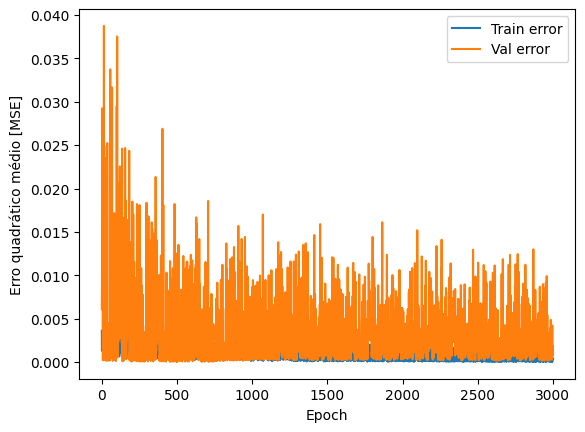

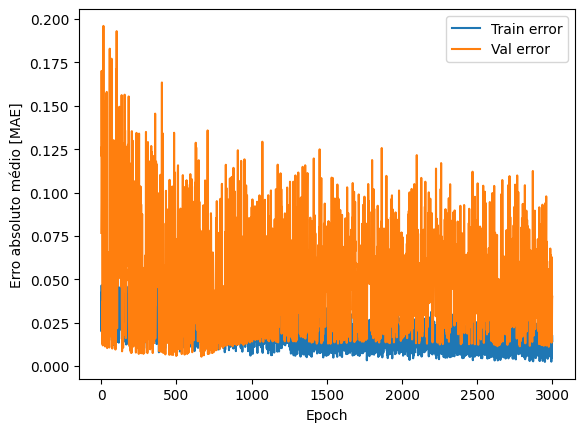

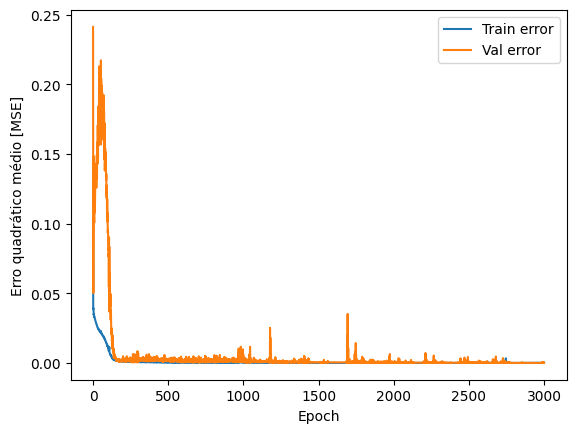

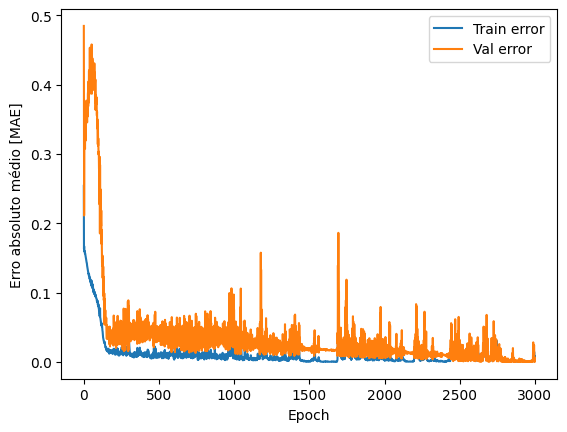

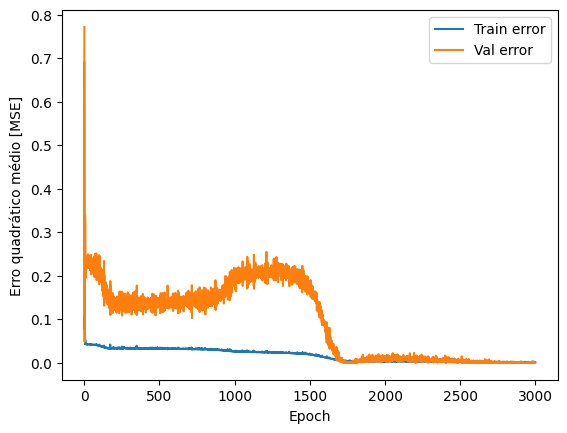

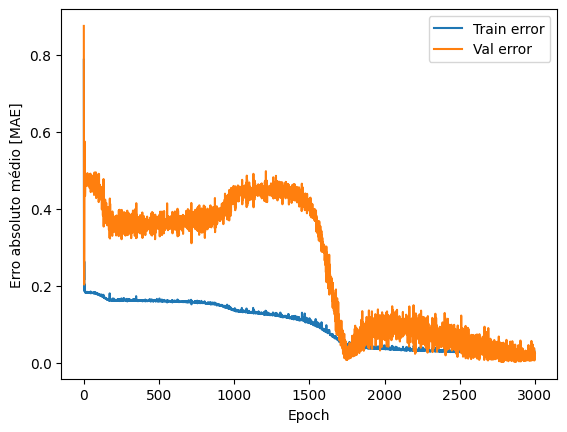

In [22]:

def printMAE(hist):
    # Gráfico do MAE no decorrer das epochs
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Erro absoluto médio [MAE]')
    # Curva com os dados de treinamento
    plt.plot(hist['epoch'], hist['mae'], label='Train error')
    # Curva com os dadosde validação 
    plt.plot(hist['epoch'], hist['val_mae'], label='Val error')
    plt.legend()

    plt.show()

def printMSE(hist):
    # Gráfico do MSE no decorrer das epochs
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Erro quadrático médio [MSE]')
    # Curva com os dados de treinamento
    plt.plot(hist['epoch'], hist['mse'], label='Train error')
    # Curva com os dadosde validação 
    plt.plot(hist['epoch'], hist['val_mse'], label='Val error')
    plt.legend()

    plt.show()

# Cria uma janela de dados a partir do objeto com a acurácia do modelo
hist_1 = pd.DataFrame(history_1.history)
hist_1['epoch'] = history_1.epoch

hist_2 = pd.DataFrame(history_2.history)
hist_2['epoch'] = history_2.epoch

hist_3 = pd.DataFrame(history_3.history)
hist_3['epoch'] = history_3.epoch

printMSE(hist_1)
printMAE(hist_1)

printMSE(hist_2)
printMAE(hist_2)

printMSE(hist_3)
printMAE(hist_3)

### Análise da curva 


7/7 [==============================] - 0s 3ms/step


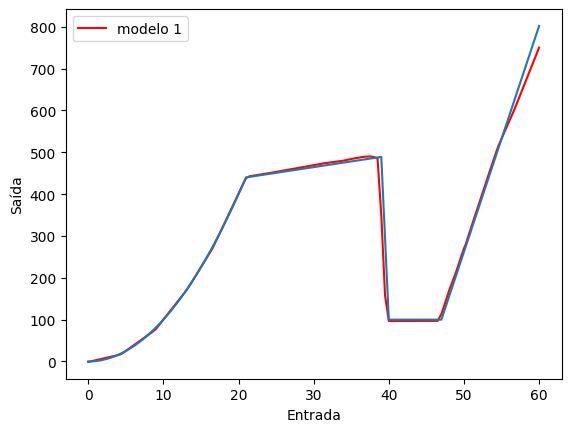

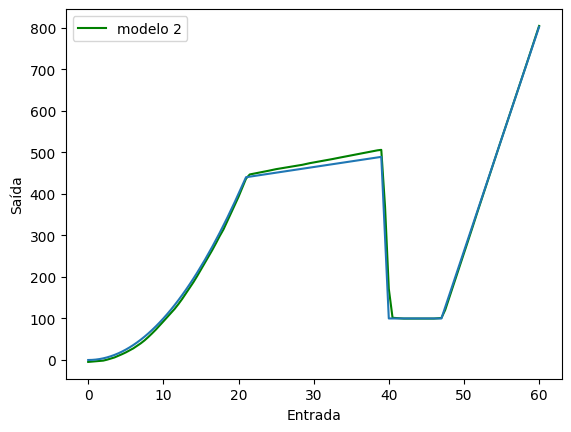

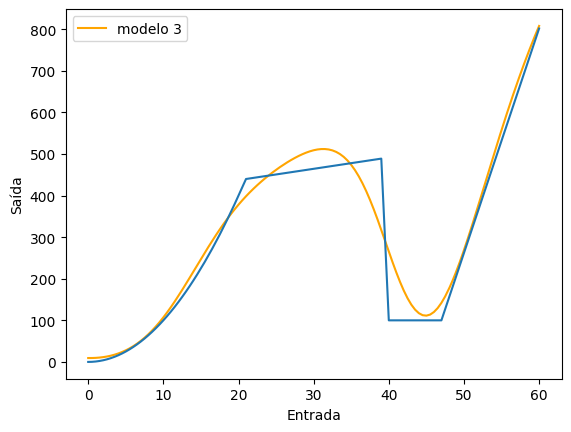

In [23]:

# Gera a previsão dos dados a partir da entrada
y_prevision1 = model_1.predict(x_normal)
y_prevision2 = model_2.predict(x_normal)
y_prevision3 = model_3.predict(x_normal)

plt.plot(dados['Entrada'], y_prevision1[:,:,0]* dados['Saída'].abs().max(), color='red', label='modelo 1')
plt.plot(dados['Entrada'], dados['Saída'])
plt.xlabel('Entrada')
plt.ylabel('Saída')
plt.legend()
plt.show()

plt.plot(dados['Entrada'], y_prevision2[:,:,0]* dados['Saída'].abs().max(), color='green', label='modelo 2')
plt.plot(dados['Entrada'], dados['Saída'])
plt.xlabel('Entrada')
plt.ylabel('Saída')
plt.legend()
plt.show()

plt.plot(dados['Entrada'], y_prevision3[:,:,0]* dados['Saída'].abs().max(), color='orange', label='modelo 3')
plt.plot(dados['Entrada'], dados['Saída'])
plt.xlabel('Entrada')
plt.ylabel('Saída')
plt.legend()
plt.show()


## Salvar modelo
A partir do exposto acima, chega-se a conclusão que o modelo 2 é o melhor. Dessa forma, ele será salvo e usado em outro script para perver os dados de entrada. 

In [24]:
model_2.save('modelo.h5')